House Prediction Linear Regression Model

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("housing.csv")

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Aim is to predict median_house_value

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
#drop all the null value, to have a cleaner data
data.dropna(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#train_test_split
#split data into training set and test set
#this allows the model to be trained using training sets and test their accuracy using test set

In [17]:
# X is the data set without the median_house_value
#y is going to be the output(median_house_value)

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
train_data = X_train.join(y_train)

In [21]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2725,-115.55,32.79,22.0,565.0,162.0,692.0,141.0,1.2083,INLAND,53600.0
16980,-122.30,37.57,36.0,2406.0,436.0,1189.0,403.0,4.7917,NEAR BAY,276100.0
15491,-117.18,33.15,7.0,6225.0,1683.0,5410.0,1580.0,2.3200,<1H OCEAN,117500.0
416,-122.27,37.89,52.0,1978.0,293.0,723.0,272.0,5.3989,NEAR BAY,335600.0
7603,-118.24,33.88,37.0,1843.0,366.0,1207.0,351.0,2.4821,<1H OCEAN,111000.0
...,...,...,...,...,...,...,...,...,...,...
15417,-117.27,33.21,5.0,5764.0,996.0,3161.0,1012.0,4.4531,<1H OCEAN,177500.0
3019,-119.42,35.19,26.0,890.0,172.0,483.0,170.0,4.1500,INLAND,68200.0
502,-122.27,37.85,47.0,1375.0,307.0,843.0,319.0,1.3785,NEAR BAY,142300.0
15741,-122.42,37.78,52.0,989.0,425.0,634.0,341.0,2.4414,NEAR BAY,275000.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

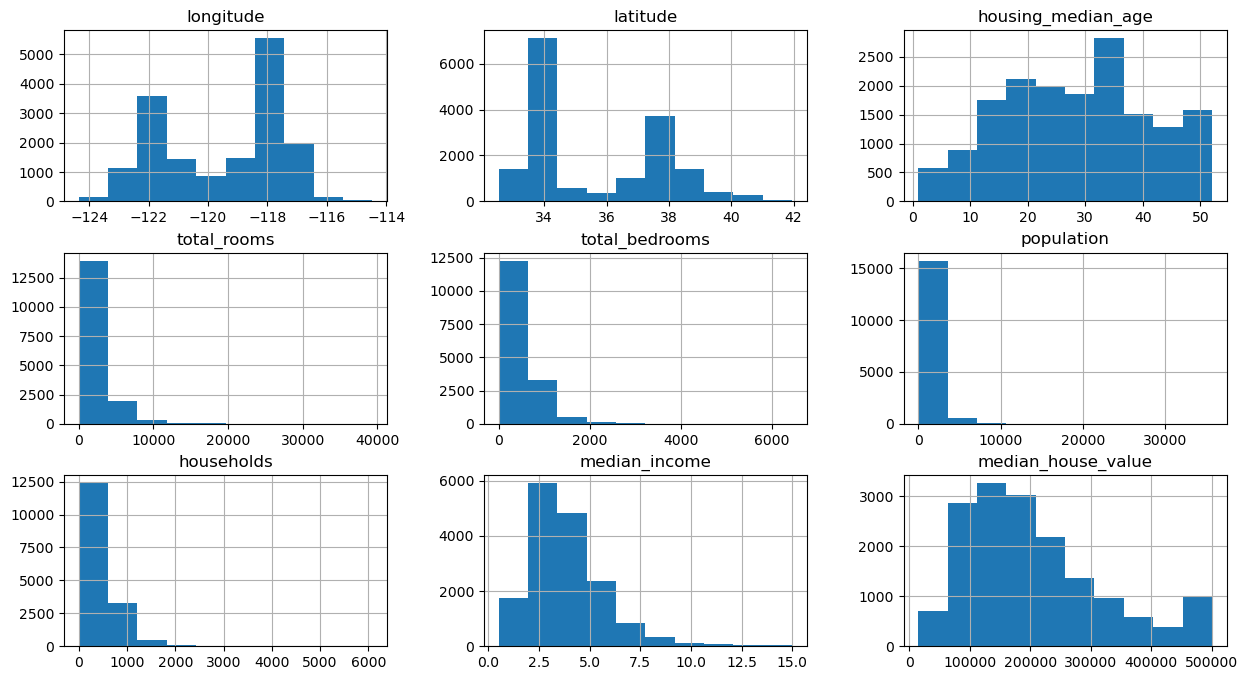

In [23]:
train_data.hist(figsize=(15, 8))

<AxesSubplot:>

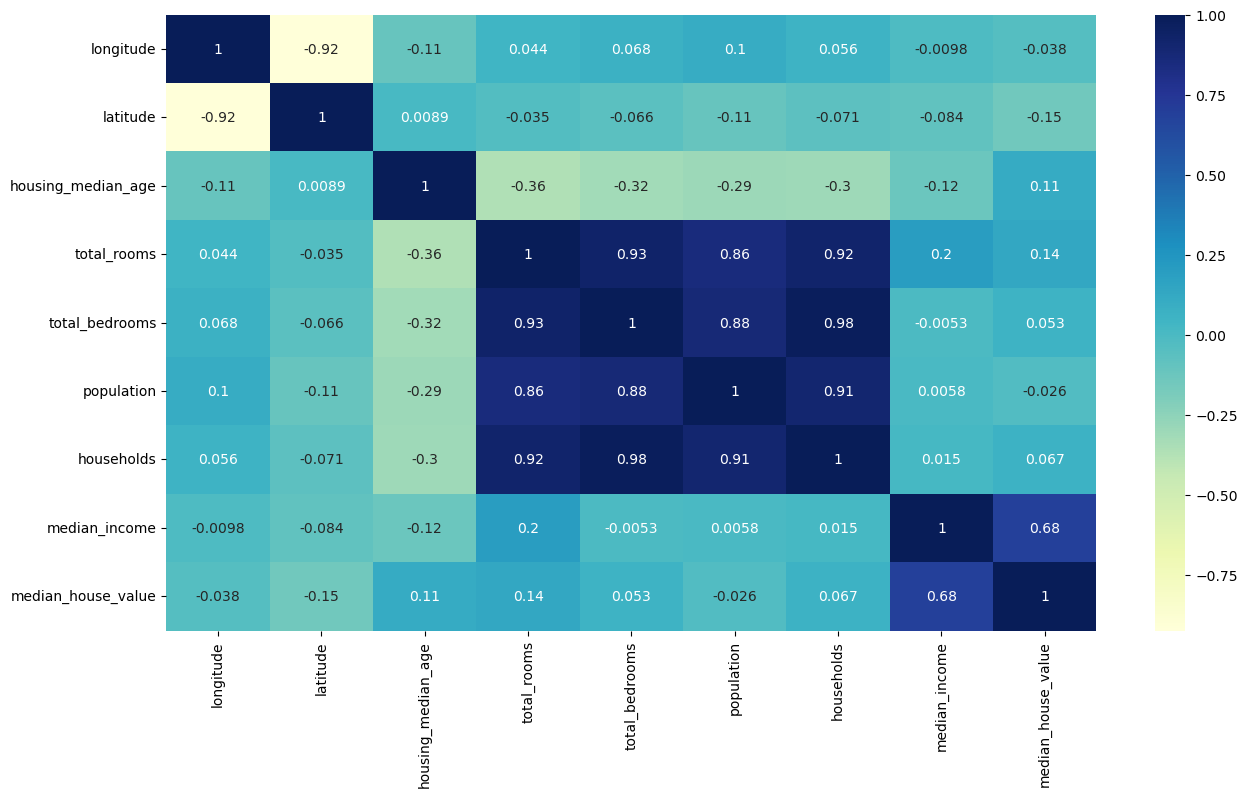

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [25]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

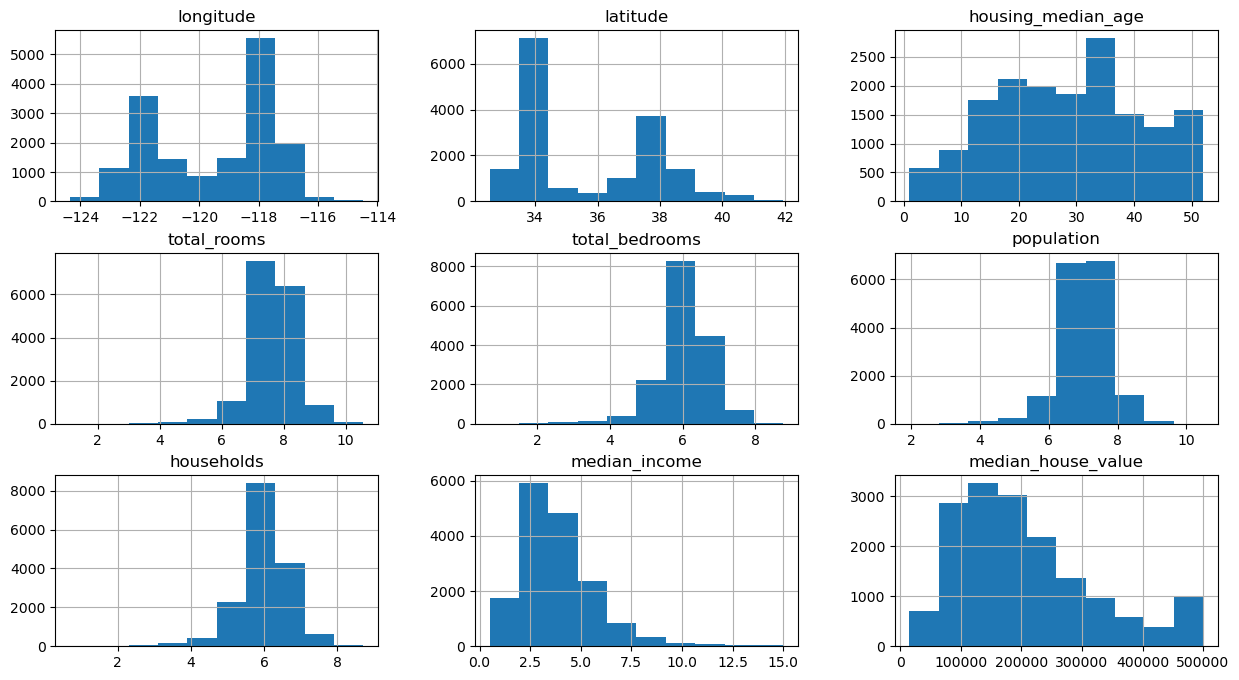

In [26]:
train_data.hist(figsize=(15,8))

In [27]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7232
INLAND        5200
NEAR OCEAN    2099
NEAR BAY      1812
ISLAND           3
Name: ocean_proximity, dtype: int64

In [30]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [31]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2725,-115.55,32.79,22.0,6.338594,5.093750,6.541030,4.955827,1.2083,53600.0,0,1,0,0,0
16980,-122.30,37.57,36.0,7.786136,6.079933,7.081709,6.001415,4.7917,276100.0,0,0,0,1,0
15491,-117.18,33.15,7.0,8.736489,7.428927,8.596189,7.365813,2.3200,117500.0,1,0,0,0,0
416,-122.27,37.89,52.0,7.590347,5.683580,6.584791,5.609472,5.3989,335600.0,0,0,0,1,0
7603,-118.24,33.88,37.0,7.519692,5.905362,7.096721,5.863631,2.4821,111000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,-117.27,33.21,5.0,8.659560,6.904751,8.058960,6.920672,4.4531,177500.0,1,0,0,0,0
3019,-119.42,35.19,26.0,6.792344,5.153292,6.182085,5.141664,4.1500,68200.0,0,1,0,0,0
502,-122.27,37.85,47.0,7.226936,5.730100,6.738152,5.768321,1.3785,142300.0,0,0,0,1,0
15741,-122.42,37.78,52.0,6.897705,6.054439,6.453625,5.834811,2.4414,275000.0,0,0,0,1,0


<AxesSubplot:>

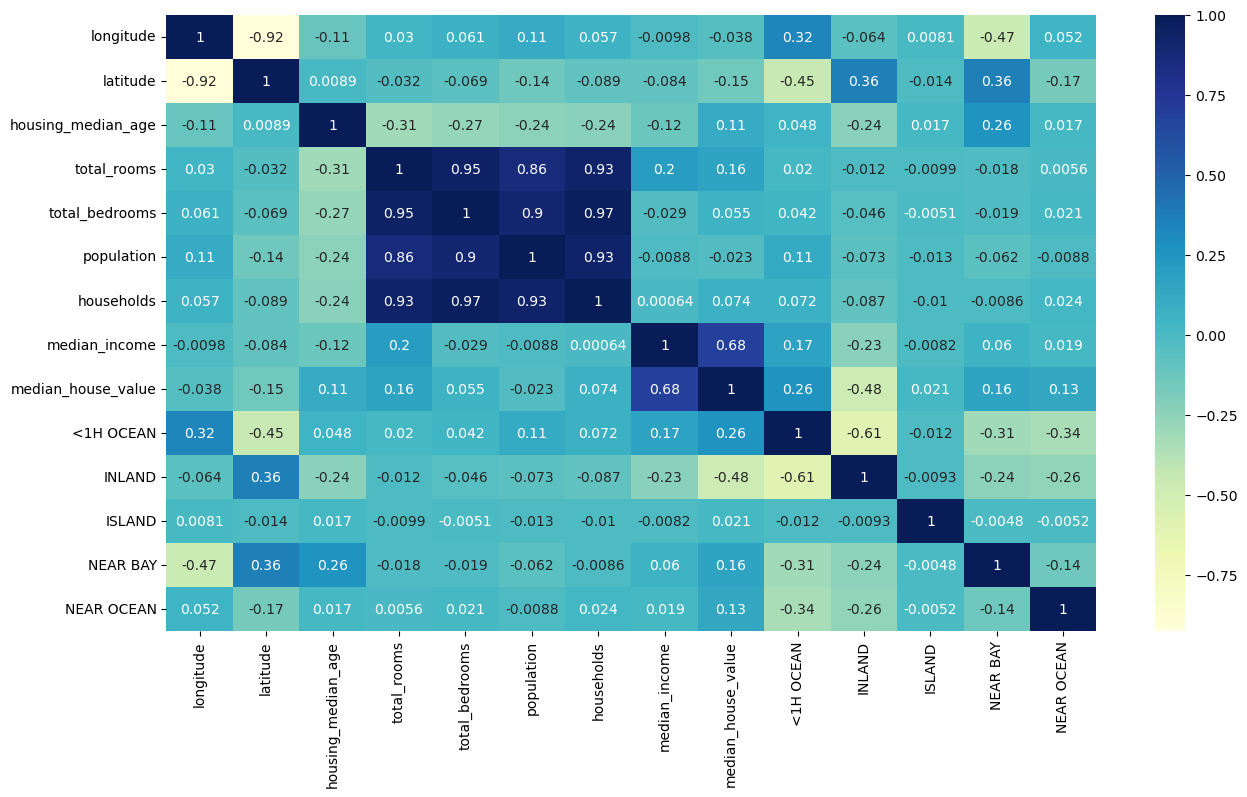

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

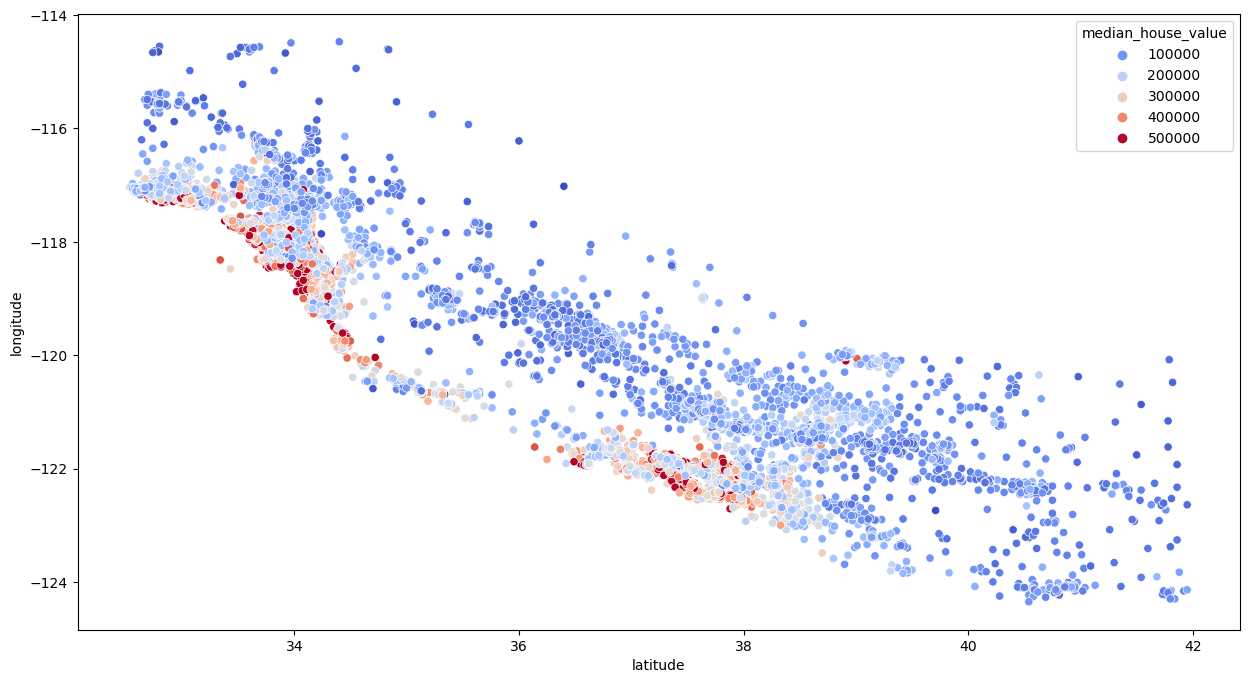

In [34]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

Feature Engineering

In [35]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot:>

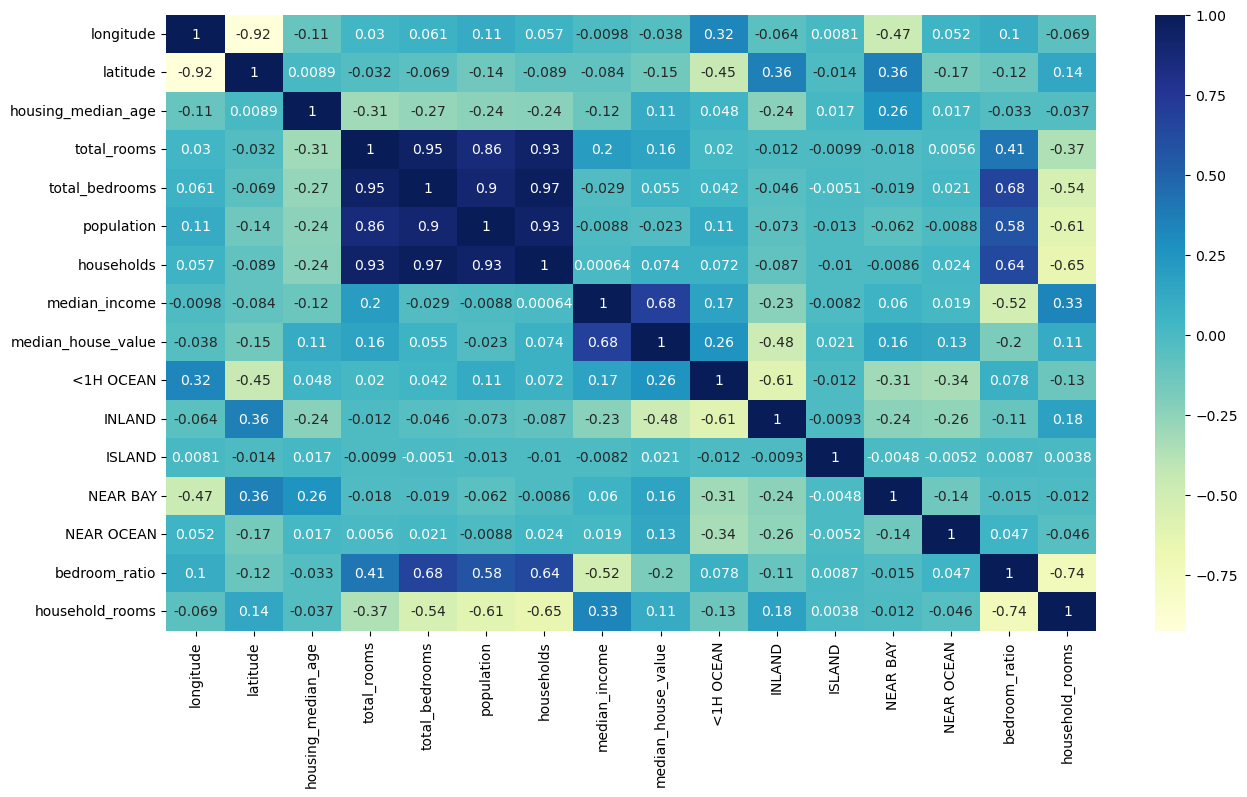

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [37]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [41]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']



In [43]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [45]:
reg.score(X_test, y_test)

0.691383287333337

Random forest Model

In [47]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
forest.score(X_test, y_test)

0.8179018634125848